In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pathlib

In [3]:
os.chdir('/content/drive/MyDrive/intern/object_detection')

In [4]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 29.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [7]:
!pip install wandb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 34.7 MB/s 
     |████████████████████████████████| 153 kB 59.6 MB/s 
     |████████████████████████████████| 181 kB 61.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=f9e0892a1c0fddd997d6b12c3b1c3f0ee11d22b8a2c3de09eab9a9c19cadff7b
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [8]:
import wandb

wandb.init(project="test-project", entity="agotech")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [9]:
cd yolov5/

/content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/yolov5


In [10]:
!python train.py --img 640 --cfg yolov5m.yaml --hyp hyp.scratch-med.yaml --batch 32 --epochs 60 --data custom_katunda_data.yaml --weights yolov5m.pt --workers 24 --name custom_katunda

wandb: Currently logged in as: tblair24 (agotech). Use `wandb login --relogin` to force relogin
train: weights=yolov5m.pt, cfg=yolov5m.yaml, data=custom_katunda_data.yaml, hyp=hyp.scratch-med.yaml, epochs=60, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=custom_katunda, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (252/252), done.
remote: Compressing objects: 100% (41

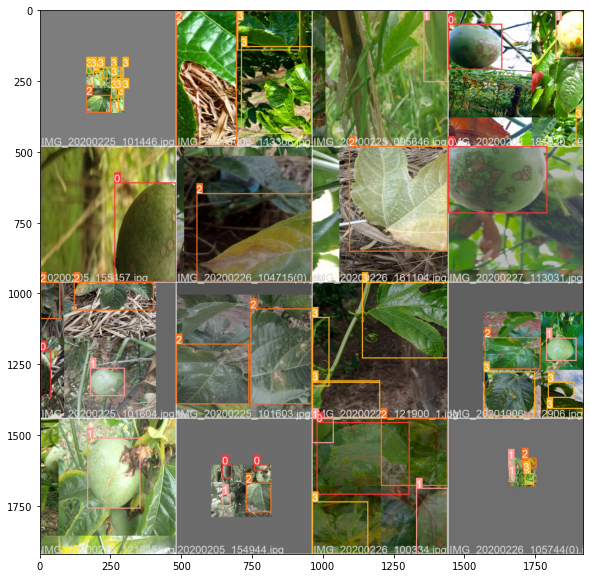

In [15]:
detections_dir = "runs/train/custom_katunda/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.figure(figsize=(10,10))
plt.imshow(np.array(random_detection_image))


In [ ]:
python detect.py --source 0  # webcam
                            file.jpg  # image 
                            file.mp4  # video
                            path/  # directory
                            path/*.jpg  # glob
                            rtsp://170.93.143.139/rtplive/470011e600ef003a004ee33696235daa  # rtsp stream
                            rtmp://192.168.1.105/live/test  # rtmp stream
                            http://112.50.243.8/PLTV/88888888/224/3221225900/1.m3u8  # http stream

# Computing mAP on test dataset

In [16]:
!python val.py --weights runs/train/custom_katunda/weights/best.pt --data custom_katunda_data.yaml --task test --name katunda_val_v1

val: data=/content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/yolov5/data/custom_katunda_data.yaml, weights=['runs/train/custom_katunda/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=katunda_val_v1, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
test: Scanning '/content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/yolov5/../custom_katunda_data/labels/test' images and labels...162 found, 0 missing, 0 empty, 0 corrupt: 100% 162/162 [02:23<00:00,  1.13it/s]
test: New cache created: /content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1